# Analyzing the COVID-19

## COVID-19 ANALYSIS

## TABLE OF CONTENTS

* [Introduction](#Introduction)
* [Problem definition](#Problem)
* [Data source](#Data)
* [Methodology](#Methodology)
* [Analysis](#Analysis)
* [Results](#Results)
* [Conclusion](#Conclution) 
* [Data](#data)


## 1. Introduction #Introduction

In December 2019 the first case of the COVID 19 was discovered in the city of Wuhan in China which is now known as the epicenter. The disease spread further to other countries around the world and currently 220 countries are affected by the virus. Data was collected from the website and used to analyze the spread of the virus. Head of states, Ministries of Health and Wellness and World Health Organization would be interested in the data collected and results. COVID-19 was chosen because it is a problem now. The Prime Minister of India wanted to know how India was doing with the COVID-19. This information will help determine what policies other countries have put in place to curb the spread of the virus. 


## 2. Problem definition

There is a need to determine how certain countries are progressing in their fight toward the COVID-19. 
 
## 3. Data source

The data was collected from the website and put in an csv file for ease of access. The data was initially collected from https://www.worldometers.info/coronavirus/
The data composes of a list of countries affected by the virus and their statistics of new cases, total cases, new deaths and total number of deaths by date. 
 
## 4. Methodology

Data cleaning: 
1. countries that have no reports of the COVID-19 were removed from the report. 
2. loop through the dataset to find contries with no deaths
3. drop such count
* As the data came with records by date, it was combined to give totals for each country. 
* Countries of interest were identified and analysed. 
* Statistical analysis methods such as bar charts were used to represent data and outcomes. 

## 7. Conclusion # Conclusion

From the countries selected:
Italy has more COVID-19 cases than the other two. It has more new cases emerging and deaths as well
Spain has the least cases
The total number of cases are increasing at an increasing rate. This means that there are more new cases  and the virus is spreading very fast.


PROJECT CODE
1. load data
2. Cleaning data
3. Explore data
4. Clustering of neighbourhoods
5. Visualise neighbourhoods

In [222]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import datetime

print('libraries imported')

libraries imported


## Loading Data

In [223]:
url='full_data.csv'
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

cases = pd.read_csv(url, parse_dates=['date'], date_parser=dateparse)
cases

df = pd.read_csv(url)

C:\Users\Ona\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [224]:
print(cases.index)


RangeIndex(start=0, stop=2867, step=1)


# CLEANING DATA


In [225]:
cases.iloc[30]

date            2020-03-17 00:00:00
location                    Albania
new_cases                         9
new_deaths                        0
total_cases                      51
total_deaths                      1
Name: 30, dtype: object

In [226]:
cases.describe()

,new_cases,new_deaths,total_cases,total_deaths
count,2707.000000,540.000000,2867.000000,587.000000
mean,131.927595,27.262963,2517.981863,404.933560
std,833.146654,78.823547,13805.255915,1020.459099
min,-10.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,2.000000,1.000000
50%,0.000000,1.000000,9.000000,5.000000
75%,7.000000,15.000000,48.000000,60.500000
max,19572.000000,855.000000,179112.000000,7426.000000


The describe function is faulty as rows have real integers that must be interpreted. The drop duplicates function shows
that the dataset has no duplicates

Drop columns contries that have no cases
We group each country and find its totals as a seperate dataset, summary

In [227]:
cases.drop_duplicates()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN
...,...,...,...,...,...,...
2862,2020-03-13,World,7488.0,338.0,132758,4956.0
2863,2020-03-14,World,9761.0,433.0,142534,5392.0
2864,2020-03-15,World,10967.0,343.0,153517,5735.0
2865,2020-03-16,World,13971.0,855.0,167506,6606.0


In [228]:
cases.dropna(how='all')

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN
...,...,...,...,...,...,...
2862,2020-03-13,World,7488.0,338.0,132758,4956.0
2863,2020-03-14,World,9761.0,433.0,142534,5392.0
2864,2020-03-15,World,10967.0,343.0,153517,5735.0
2865,2020-03-16,World,13971.0,855.0,167506,6606.0


### Clustering of neighbourhoods
Now we group the data by country to find the totals for each country

In [229]:
#find summary of cases for each country
locations=cases.groupby(['location']).sum()
locations.head()

,new_cases,new_deaths,total_cases,total_deaths
location,,,,
Afghanistan,20.0,0.0,96,0.0
Albania,49.0,0.0,211,4.0
Algeria,59.0,3.0,356,14.0
Andorra,13.0,0.0,31,0.0
Antigua and Barbuda,0.0,0.0,4,0.0


In [230]:
sum_countries=countries.groupby(['location']).sum()
sum_countries.head()

,new_cases,new_deaths,total_cases,total_deaths
location,,,,
China,80838.0,3225.0,2943625,98139.0
India,136.0,2.0,961,10.0
South Africa,61.0,0.0,219,0.0


### Adding a days column

In [231]:
cases['date'] - cases['date'].min()

0      35 days
1      36 days
2      37 days
3      38 days
4      39 days
         ...  
2862   52 days
2863   53 days
2864   54 days
2865   55 days
2866   56 days
Name: date, Length: 2867, dtype: timedelta64[ns]

In [232]:
cases['days'] = cases['date'] - cases['date'].min()

### Picking only countries of interest

In [233]:
cased = cases[cases['location'].isin(['Spain', 'Iran','Italy'])]
cased

,date,location,new_cases,new_deaths,total_cases,total_deaths,days
1173,2020-02-20,Iran,NaN,NaN,2,2.0,30 days
1174,2020-02-21,Iran,3.0,0.0,5,2.0,31 days
1175,2020-02-22,Iran,13.0,2.0,18,4.0,32 days
1176,2020-02-23,Iran,10.0,1.0,28,5.0,33 days
1177,2020-02-24,Iran,15.0,3.0,43,8.0,34 days
...,...,...,...,...,...,...,...
2361,2020-03-13,Spain,825.0,36.0,2965,84.0,52 days
2362,2020-03-14,Spain,1266.0,36.0,4231,120.0,53 days
2363,2020-03-15,Spain,1522.0,16.0,5753,136.0,54 days
2364,2020-03-16,Spain,2000.0,152.0,7753,288.0,55 days


### Group cased by date(months or weeks)


In [234]:
_countries = cased.groupby(['location']).sum()
_countries.head()
#cased.index = cased['date'] 

#cased.resample('M').sum()


,new_cases,new_deaths,total_cases,total_deaths
location,,,,
Iran,14989.0,851.0,118358,5171.0
Italy,27978.0,2501.0,173393,11277.0
Spain,9190.0,308.0,37011,1073.0


## Getting the total cases per country

In [235]:
df_total_cases_all_countries =  cased[['location', 'days', 'total_cases']].groupby(['location', 'days']).sum().unstack('location')['total_cases']


In [236]:
df_total_cases_all_countries

location,Iran,Italy,Spain
days,,,
10 days,NaN,2.0,NaN
11 days,NaN,2.0,1.0
12 days,NaN,2.0,1.0
13 days,NaN,2.0,1.0
14 days,NaN,2.0,1.0
15 days,NaN,2.0,1.0
16 days,NaN,2.0,1.0
17 days,NaN,3.0,1.0
18 days,NaN,3.0,1.0


Plot graphs for each country


 ## Plot graph for all country statistics by days

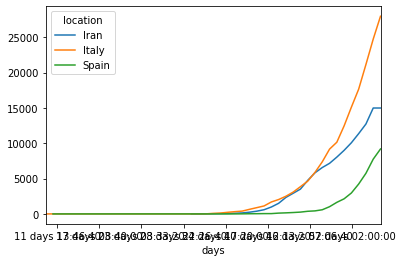

In [237]:
df_total_cases_all_countries.plot()

## Looking at Spain Data

In [254]:
#dfCh = df[df['location'] == 'Spain'][['days', 'total_cases', 'total_deaths']].groupby('days').sum()
dfWW = cases[cases['location'] == 'Spain'][['days', 'total_cases', 'total_deaths']].groupby('days').sum()

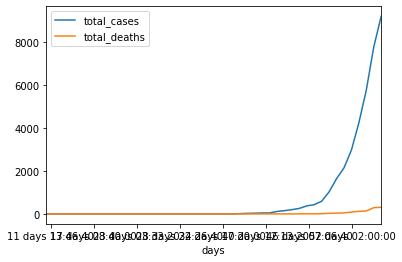

In [255]:
dfWW.plot()

## Looking at Iran Data

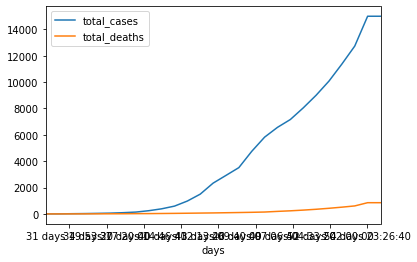

In [250]:
dfWW = cases[cases['location'] == 'Iran'][['days', 'total_cases', 'total_deaths']].groupby('days').sum()
dfWW.plot()

 ## DATA FOR ITALY

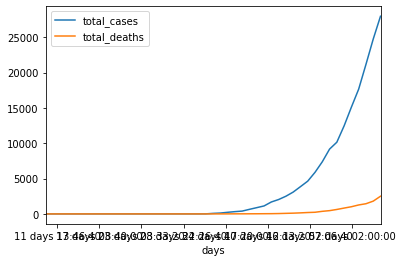

In [256]:
#dfCh = df[df['location'] == 'Spain'][['days', 'total_cases', 'total_deaths']].groupby('days').sum()
Italy = cases[cases['location'] == 'Italy'][['days', 'total_cases', 'total_deaths']].groupby('days').sum()
Italy.plot()

In [102]:
heads=location.head(5)
#heads= heads[(heads['location'] == "new_cases") | (loan['location'] == "new_deaths")| (loan['location'] == "total_cases")| (loan['location'] == "total_deaths")]
heads

,new_cases,new_deaths,total_cases,total_deaths
location,,,,
Afghanistan,20.0,0.0,96,0.0
Albania,49.0,0.0,211,4.0
Algeria,59.0,3.0,356,14.0
Andorra,13.0,0.0,31,0.0
Antigua and Barbuda,0.0,0.0,4,0.0


In [175]:
### create a 
_countries.head()
#plt.show()

,new_cases,new_deaths,total_cases,total_deaths
location,,,,
China,80838.0,3225.0,2943625,98139.0
India,136.0,2.0,961,10.0
South Africa,61.0,0.0,219,0.0


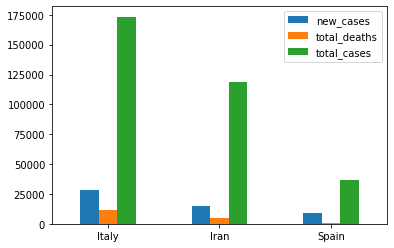

In [220]:
new_cases = _countries['new_cases']
total_deaths= _countries['total_deaths']
total_cases = _countries['total_cases']
index =  ['Italy','Iran','Spain']

df = pd.DataFrame({'new_cases': new_cases,'total_deaths': total_deaths,
                   'total_cases': total_cases}, index=index)
ax = df.plot.bar(rot=0)